# Este programa faz uma análise do campo "vacina_descricao_dose"
# para identificar se é a 1. Dose ou já e a 2.Dose da vacina
# contra a COVID-19


In [1]:
# Importar bibliotecas importantes:


import csv
import time
import requests 
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np


# Tratando a data de aplicacao da vacina

from datetime import datetime

# Biblioteca de Plots:
import seaborn as sns
sns.set()


# Leitura do arquivo de Vacinacao completo selecionando alguns
# campos para pesquisa:


df = pd.read_csv("BD_Amostra-Alguns-26-05-2021.csv", sep=";")
usecols = ['vacina_fabricante_nome',
                 'paciente_idade',
                 'paciente_id',
                 'vacina_dataAplicacao',
                 'paciente_endereco_uf',
                 'vacina_descricao_dose']

                 

                 

# Tratando o campo "vacina_dataAplicacao"  para verificar a data de
## aplicação da Vacina Primeira Dose e se após um tempo tomou a 
## Segunda Dose:

In [2]:
#Verificar o conteúdo do campo "vacina_descricao_dose"

df["vacina_descricao_dose"].unique()

array(['\xa0\xa0\xa0\xa01ª\xa0Dose', '\xa0\xa0\xa0\xa02ª\xa0Dose',
       '1ª Dose', '2ª Dose', 'Única'], dtype=object)

In [3]:
# Fazendo uma limpeza do campo "vacina_descricao_dose":

# 1) Transformando todos as linhas como Minuúsculas
# 2) Quando aparecer Null (NaN) substitui-se por "-"
# 3) Tratando todos os caracteres ASCII 

df["vacina_descricao_dose"] = (df["vacina_descricao_dose"]
                                 .str.lower()
                                 .str.normalize("NFKD")
                                 .str.lstrip()
                                 .str.replace(" ","_")
                                 .str.encode("ascii", errors="ignore")
                                 .str.decode("utf-8"))


In [4]:
df["vacina_descricao_dose"].unique()


array(['1a_dose', '2a_dose', 'unica'], dtype=object)

In [5]:
df.shape

(61478, 6)

In [6]:
# Mostra a quantidade de vacinados com a 1a_dose e 2a_dose'

df["vacina_descricao_dose"].value_counts()


1a_dose    42101
2a_dose    19376
unica          1
Name: vacina_descricao_dose, dtype: int64

<AxesSubplot:>

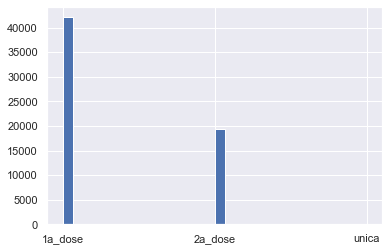

In [7]:
df['vacina_descricao_dose'].hist(bins=30)

# Criando um Pivot table para calcular pessoas vacinadas
## com a 1. dose e 2. dose

In [8]:
test = df

doses_pivot = pd.pivot_table(data = test,
                            index = "paciente_id",
                            columns = "vacina_descricao_dose",
                            values = "vacina_dataAplicacao",
                            aggfunc = "count",
                            fill_value = np.nan)


In [9]:
#Tomaram primeira e segunda dose:
# Aqueles que nao sao nulos para segunda dose e para primeira dose:


print("Criando o doses_pivot...")

doses_pivot.loc[(~doses_pivot["2a_dose"].isnull()) & 
                (~doses_pivot["1a_dose"].isnull())]


Criando o doses_pivot...


vacina_descricao_dose,1a_dose,2a_dose,unica
paciente_id,,,
109c0ac7533b5538b549cddc3a642c7f7e0501c6e448e2e8b831cec9fc281fe9,1.0,1.0,NaN
15317ebb6e68cecbc04c113b4863f4d7e578f53027c0dd76c1c78c990da05af4,1.0,1.0,NaN
2429727e4d07619c4f9558a82bc666ba684c3ef60e2b796ec9fbe95610ca1da9,1.0,1.0,NaN
28d2f1bbcb30fd0112215342118dca96ceb7f48b4767d4706022869be40022c0,1.0,1.0,NaN
2b6860c88489fee6dd2d844d307f434cb7ab53125ac36387596afb8ee313fbec,1.0,1.0,NaN
2d4a5c1e86ccb29469eb0ec5d5eb90db5dfcdd28cb293bcb83b39b20895c4e69,1.0,1.0,NaN
35f8193639adab66772a08d55c7243aaabfe80d9de3c247a6be8ecfe4b7f7747,1.0,1.0,NaN
37076edd2dee809de71f96a8b7c695591a79be2e9b9c85bb7392ece735273bcf,1.0,1.0,NaN
38e50de9ebed1ec12ce43d2484d2922c92c8414236775914ed5bc03ed3835394,1.0,1.0,NaN


# Tomaram primeira e segunda dose:
# Aqueles que nao sao nulos para segunda dose e para primeira dose:



<AxesSubplot:title={'center':'Vacinados no Brasil'}, xlabel='vacina_descricao_dose', ylabel='Count'>

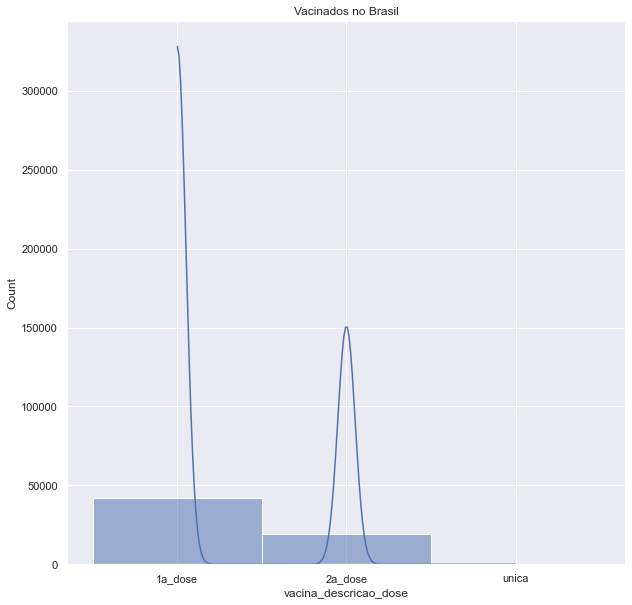

In [12]:
fig = plt.figure(figsize = (10,10))


plt.title("Vacinados no Brasil")

sns.histplot(data=test, x="vacina_descricao_dose", kde=True)

<AxesSubplot:xlabel='vacina_descricao_dose', ylabel='count'>

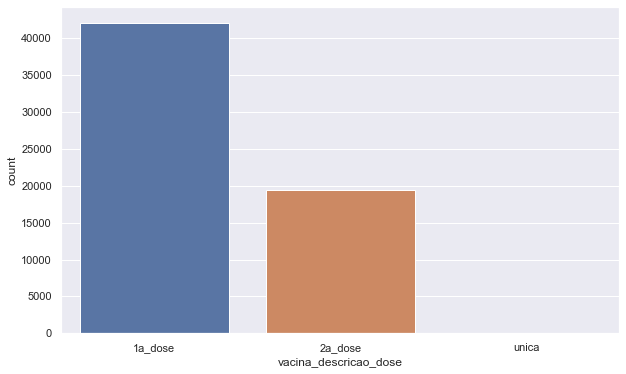

In [11]:
plt.figure(figsize = (10,6))
sns.countplot(data=test, x = "vacina_descricao_dose")